# Introduction

This notebook presents the pre-processing of the S&P 500 data used to produce the input tensors of the neural network. <br>
For each stock, the input is a raw time series of the prices (High, Low, Open, Close). 
The output is a matrix of 4 rows and n (number of available data points) columns. <br>
The columns correspond to:
- Close(t-1)/Open(t-1)
- High(t-1)/Open(t-1)
- Low(t-1)/Open(t-1)
- Open(t)/Open(t-1)
    
<u>Remark:</u> We don't need to normalize the data since it's already of ratio of 2 prices closed to one. 

# Imports

In [1]:
#for navigation in the folders
import os
import pathlib

from time import strptime
from datetime import datetime

from tqdm import tqdm

#for plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
import PIL
import pickle
from time import strftime

import seaborn as sns
sns.despine()


<Figure size 432x288 with 0 Axes>

# Processing 

In [2]:
data_dir = '/NIFTY50/NIFTY50/'
directory = os.getcwd() + data_dir # path to the files
files_tags = os.listdir(directory) #these are the differents pdf files

#this is here because hidden files are also shown in the list. 
for file in files_tags:
    if file[0] == '.':
        files_tags.remove(file)
stock_name = [file.split('_')[0] for file in files_tags]
stocks = [file for file in files_tags]
print(len(stock_name) == len(stocks))
print('There are {} different stocks.'.format(len(stock_name)))

True
There are 49 different stocks.


In [3]:
kept_stocks = list()
not_kept_stocks = list()
close_price = pd.DataFrame()

for s in tqdm(stocks):
    if s is not 'f':
        df = pd.read_csv(os.getcwd() + data_dir + s , index_col='Date')
        close_price[s[:-4]]=df.Close
        if len(df)!=5287:
            not_kept_stocks.append(s)
        else:
            kept_stocks.append(s)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 76.42it/s]


In [4]:
kept_stocks

['ASIANPAINT.csv',
 'AXISBANK.csv',
 'BPCL.csv',
 'CIPLA.csv',
 'DRREDDY.csv',
 'GRASIM.csv',
 'HDFC.csv',
 'HDFCBANK.csv',
 'HEROMOTOCO.csv',
 'HINDALCO.csv',
 'HINDUNILVR.csv',
 'ICICIBANK.csv',
 'INFY.csv',
 'IOC.csv',
 'ITC.csv',
 'MM.csv',
 'ONGC.csv',
 'RELIANCE.csv',
 'SBIN.csv',
 'SUNPHARMA.csv',
 'TATAMOTORS.csv',
 'TATASTEEL.csv',
 'TITAN.csv',
 'WIPRO.csv',
 'ZEEL.csv']

In [5]:
list_open = list()
list_close = list()
list_high = list()
list_low = list()

for s in tqdm(kept_stocks):
    data = pd.read_csv(os.getcwd() + data_dir + s).fillna('bfill').copy()
    data = data[['Open', 'Close', 'High', 'Low']]
    list_open.append(data.Open.values)
    list_close.append(data.Close.values)
    list_high.append(data.High.values)
    list_low.append(data.Low.values)

array_open = np.transpose(np.array(list_open))[:-1]
array_open_of_the_day = np.transpose(np.array(list_open))[1:]
array_close = np.transpose(np.array(list_close))[:-1]
array_high = np.transpose(np.array(list_high))[:-1]
array_low = np.transpose(np.array(list_low))[:-1]

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 28.61it/s]


In [6]:
X = np.transpose(np.array([array_close/array_open, 
                           array_high/array_open,
                           array_low/array_open,
                           array_open_of_the_day/array_open]), axes= (0,2,1))
X.shape

(4, 25, 5286)

The shape corresponds to:
- 4: Number of features
- 5: Number of stocks we want to study
- 17030: Number of data points

# Save

In [7]:
np.save('./np_data/inputNifty50.npy', X)

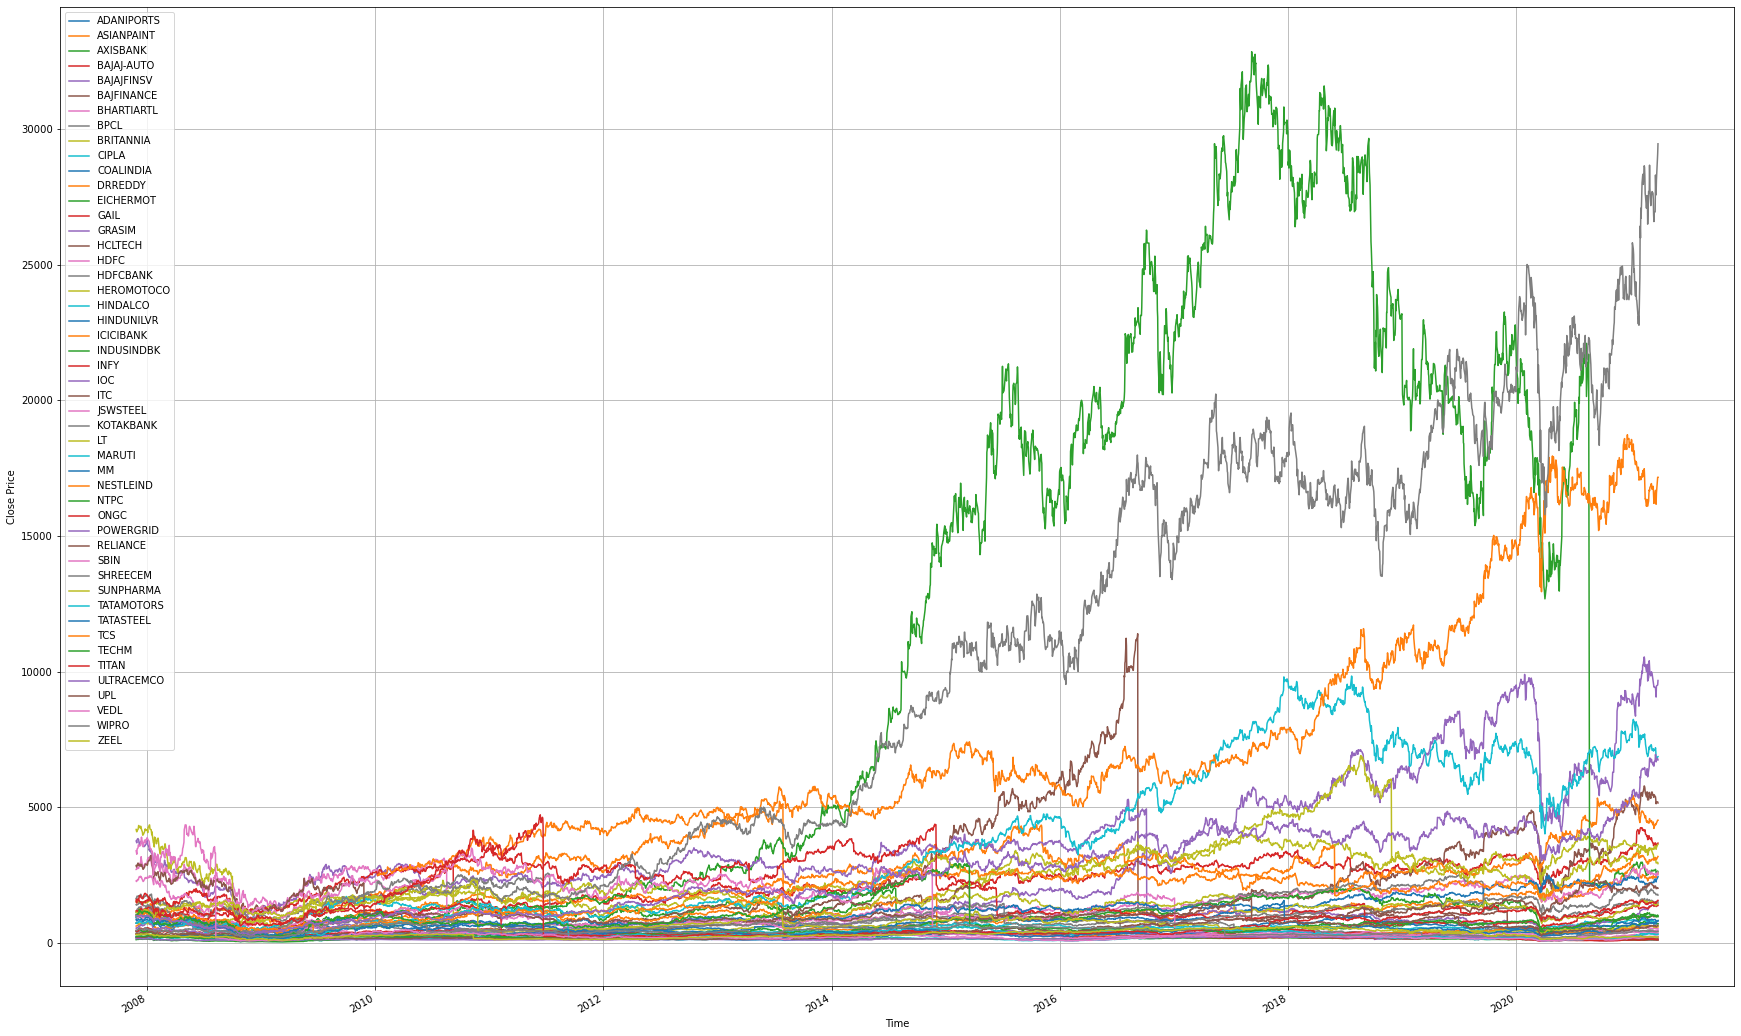

In [8]:
close_price = close_price.fillna(method='ffill')
close_price.index =close_price.index.astype('datetime64[ns]')
# close_price=close_price.dropna(inplace = False)
%matplotlib inline
_ = pd.concat([close_price],axis=1).plot(figsize=(30,20),grid=True, xlabel='Time', ylabel='Close Price')
plt.savefig('./niftyfig/allnifty.png')

```
▪The End
```